# Mann-Whitney U Test Criterion

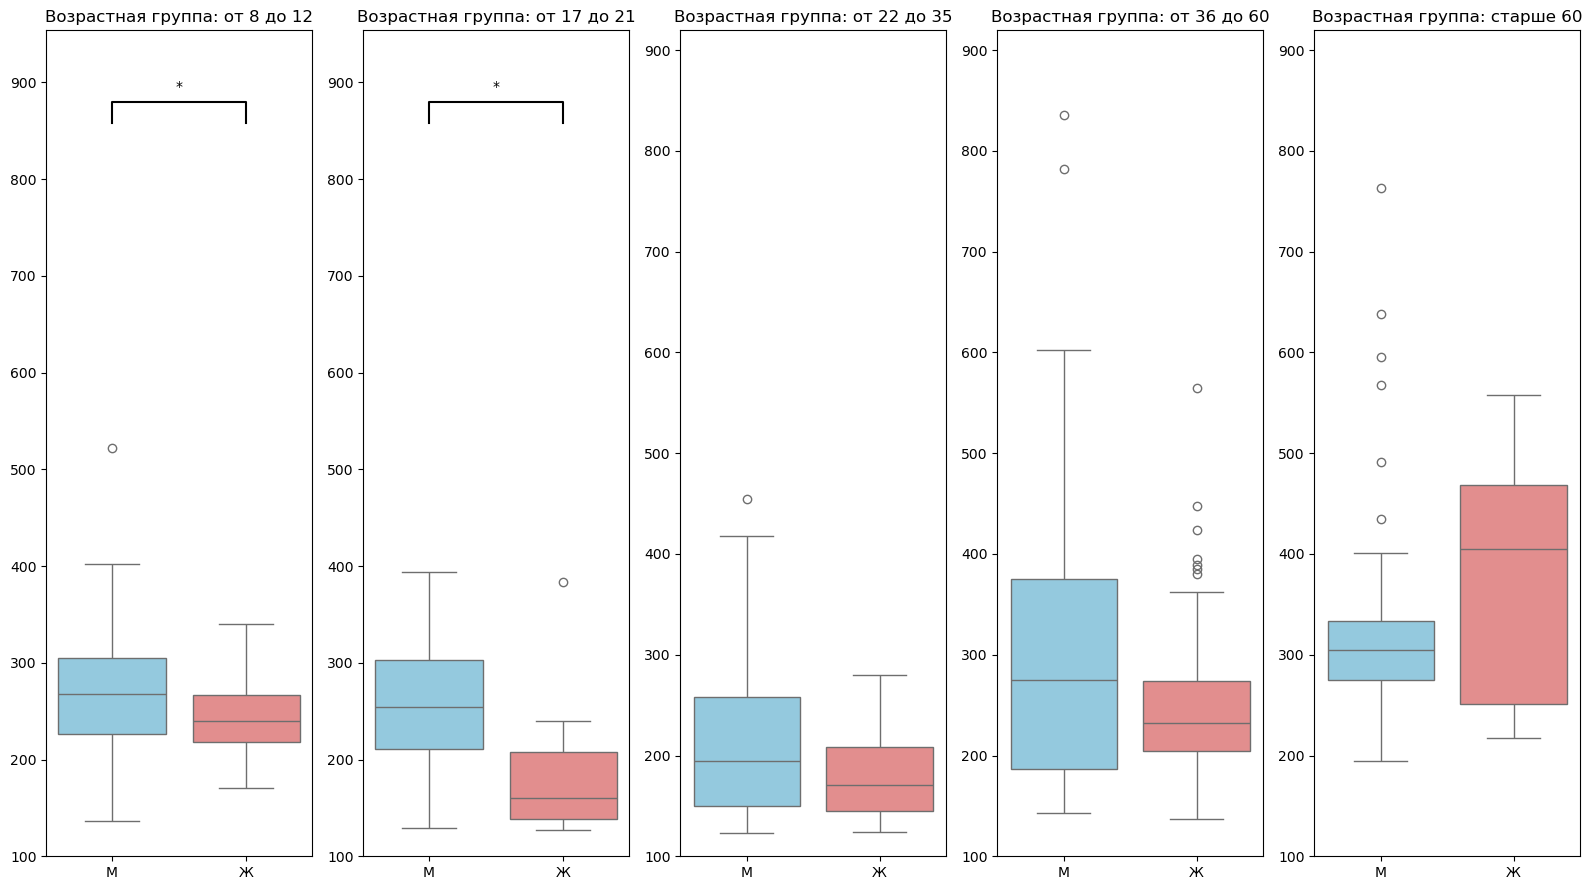

In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import mannwhitneyu 

wr.filterwarnings('ignore')

# Loading and reading dataset
df = pd.read_excel("dataset_mental_report_new.xlsx")
df.drop(["Unnamed: 0"], axis=1, inplace=True)  # Deleted first column

# Calculating Mann-Whitney U for each age group, hue = gender
old_group_values = list(set(df['old_group'].tolist()))
alphas = []
groups_to_remove = []

for group in old_group_values:
    temp_df = df.loc[df['old_group'] == group]
    x = temp_df.query('gender == "М"')['stroop_duration']
    y = temp_df.query('gender == "Ж"')['stroop_duration']

    if x.empty or y.empty:
        groups_to_remove.append(group)
        continue

    stats, alpha = mannwhitneyu(x, y)
    alphas.append(alpha)

for group in groups_to_remove:
    old_group_values.remove(group)

group_alpha_df = pd.DataFrame({'group': old_group_values, 'alpha': alphas})

# Function to sort groups
def custom_sort(group):
    first_number = group.split('_')
    return int(first_number[0])

# Sorting groups
group_alpha_df.sort_values(by='group', key=lambda x: x.map(custom_sort), inplace=True)

# Найти минимальное и максимальное значение stroop_duration для всего DataFrame
y_min = df['stroop_duration'].min()
y_max = df['stroop_duration'].max()

# Plotting boxplots
plt.figure(figsize=(16, 9))
for i, row in enumerate(group_alpha_df.itertuples()):
    group = row.group
    alpha = row.alpha
    temp_df = df.loc[df['old_group'] == group]
    plt.subplot(1, len(group_alpha_df), i + 1)  
    ax = sns.boxplot(data=temp_df, x='gender', y='stroop_duration', hue='gender', palette={"М": "skyblue", "Ж": "lightcoral"}, order = ['М', 'Ж'])
    if (alpha >= 0.05):
        ax.set_ylim(100, y_max * 1.1)
    else:
        ax.set_ylim(100, y_max)
    age_range = group.split('_')
    if age_range[1] == 'PLUS':
        plt.title(f'Возрастная группа: старше {age_range[0]}')
    else:
        plt.title(f'Возрастная группа: от {age_range[0]} до {age_range[1]}')
    plt.xlabel('')
    plt.ylabel('')

    # Drawing annotation
    if (alpha < 0.05):
        starbars.draw_annotation([(0, 1, alpha)], ax=ax) 
plt.savefig("output.jpg")
plt.tight_layout()
plt.show()

